Chapter 14 of [A Guided Tour of Mathematical Methods for the Physical Sciences](https://www.cambridge.org/core/books/guided-tour-of-mathematical-methods-for-the-physical-sciences/3C5AAC644C2B09F3F17837E703516920) introduces Fourier Analysis. In it, (well-behaved) functions can be transformed into a sum of trigonometric function, whereas discrete series can be represented in so-called Fourier series. The former application helps us solve differential equations, for example, and the latter is used to explore the frequency content in a time series, among other things. Let us focus in this notebook on an application of the latter. First, we load some libraries we are going to use:

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import pandas as pd

Next, we download two years of measurements of the sea height in the Auckland Harbour. The interval between measurements is 1000 seconds:

In [2]:
df = pd.read_csv('https://auckland.figshare.com/ndownloader/files/21944535',squeeze=True)
sea_height = df.values
dt = 1000 # in seconds
t = np.arange(len(sea_height))*dt # in seconds

And we plot these data:

<IPython.core.display.Javascript object>


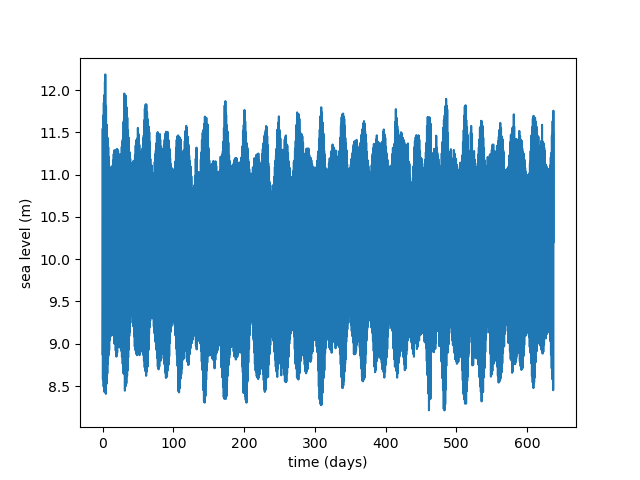

In [3]:
days = t/3600/24
%matplotlib notebook
plt.figure()
plt.plot(days,sea_height)
plt.xlabel('time (days)')
plt.ylabel('sea level (m)')
plt.show()

Fluctuations at this time scale are for a large part due to the tides. Zoom in to explore this time series in more detail. By eye, it appears the tide is dominated by a diurnal signal with a significant amplitude variation. 

### Fourier

Let us have a closer look at the signal, with Fourier analysis. We can decompose the time series $f(t)$ of length $L$ as

\begin{equation}
    f(t) = \sum_{n=-\infty }^{\infty }c_{n}\;e^{in\pi t/L},  \label{Four.16}
\end{equation}
and the coeffients $c_n$ can be calculated with 
\begin{equation}
    c_{n}=\frac{1}{2L}\int_{-L}^{L}f(x)e^{-in\pi t/L}dx.  
    \label{Four.18}
\end{equation}
With $f(t)$ being a time series, the $c_n$ coefficients represent its frequency spectrum, and the coefficients are spaced by $1/L$. This means that in theory the longer the time series ($L$), the greater spectral resolution.

In practice, we'll approximate $f(t)$ with L coefficients in a discrete fourier transform algorithm called the Fast Fourier Transform. In python, we have a library for that in the numpy.fft suite:

In [4]:
cn = np.fft.fft(sea_height) # array of the (complex) Fourier coefficients
freq = np.fft.fftfreq(t.shape[-1],dt) # array of the frequencies associated with each coefficient

period = 1/freq/3600 # The period in hours (never mind the warning when it comes to the divisiont when freq=0)

/home/kvan637/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


The absolute value of the complex Fourier coefficients $c_n$ present information about the power in the signal at each frequency: 

<IPython.core.display.Javascript object>


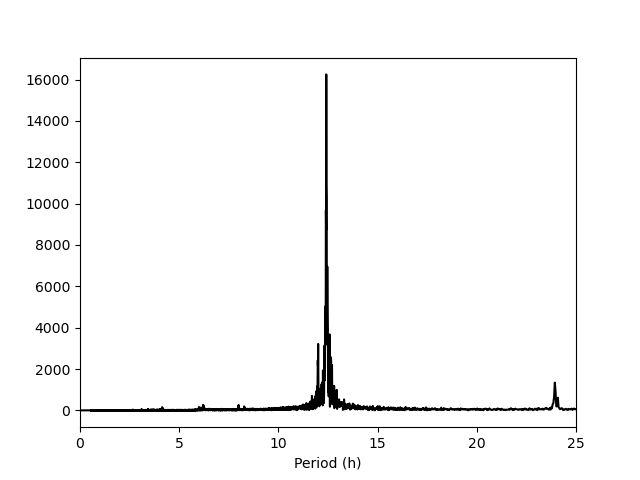

In [5]:
plt.figure()
plt.plot(period,np.abs(cn), color='black')
plt.xlim(0,25) # zooming in on periods between 0 and 25 hours
plt.xlabel("Period (h)")
plt.show()

From the absolute value of the Fourier transform of two years of sea level measurements in the Auckland Harbour, we confirm the main period in the signal is roughly 12 hours. We say "rougly", because have a closer look by zooming in on the largest peak. What do you observe? 

Tides on Earth are the result of the gravitational attraction of (large) bodies of mass. The biggest contributor is the Moon, followed by the Sun. The mass of the moon is much smaller than the Sun, but its greater proximity to Earth more than makes up for that. On average, the Sun contributes 40% of the total tidal energy. It may be obvious that the Earth experiences high tide when it faces the Sun or the Moon, but there is also a high tide associated on the opposite side of Earth. The Earth spins around its axis in 24 hours, and this means we can see spikes at 12 and 24 hours due to the Sun (named $S_2$ and $S_1$, respectively). However, because our Moon rotates around the Earth in 29.5 days, the period of diurnal lunar contribution is 12.4 hours. This is called the $M_2$ period. A smaller peak at 12 hours is the diurnal solar contribution, and the 24-hr peak is the daily contribution from the Sun. In the time domain, the original plot of our data, these close but different periods result in a beat pattern in the amplitudes of sea height.

### Multi-tapering
The absolute value of the output of the FFT of a single realisation of a noisy discrete and finite time series can be a poor representation of the true power spectrum. Several methods attempt to address the uncertainties in these estimates. One of those techniques is called the multi-taper method, and [free python code exists](https://github.com/krischer/mtspec).

### Homework 
Install the multitaper [MTSPEC](https://github.com/krischer/mtspec) package either here on your server in the cloud, or on your local computer. Run the multitaper method on this time series to determine which peaks in the power spectral estimate are significant, and which are not. We discussed the ~12 hr and 24 hr periods, but how about the smaller bumps between 0 and 10 hr periodicity in the figure above. Do you think they are real?